In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('data/table1_zcta.csv')
zipcode = pd.read_csv('../arcos-ca/pills.csv')
zipcode = zipcode.head(10)

In [58]:
merge = pd.merge(zipcode, df, how='left', on='Zip Code')
merge['Pills Per Person'] = merge['Pills'] / merge['Population']
merge = merge.sort_values(by=['Pills'])
merge

,Zip Code,City,Pills,Population,Male,Female,Median age (years),Male Median age (years),Female Median age (years),Pills Per Person
9,95823,SACRAMENTO,5053810,73985,35609,38376,29.1,27.9,30.2,68.308576
8,95661,ROSEVILLE,5261460,29791,14092,15699,40.3,38.4,41.8,176.612400
7,95355,MODESTO,5795360,58311,27916,30395,36.4,34.8,37.7,99.387080
6,95926,CHICO,5944440,37725,18823,18902,27.2,26.4,28.4,157.572962
5,92880,EASTVALE,6073560,58763,29140,29623,31.5,31.0,32.0,103.356874
4,95825,SACRAMENTO,6087880,31084,14675,16409,32.5,31.4,33.9,195.852529
3,95350,MODESTO,6547370,51046,24435,26611,36.8,34.1,39.3,128.264115
2,92010,CARLSBAD,10548200,14382,6950,7432,39.8,38.9,40.5,733.430677
1,90242,DOWNEY,21791650,43497,21207,22290,31.6,30.5,32.8,500.992022
0,94550,LIVERMORE,52022690,46896,23071,23825,40.7,40.1,41.2,1109.320411


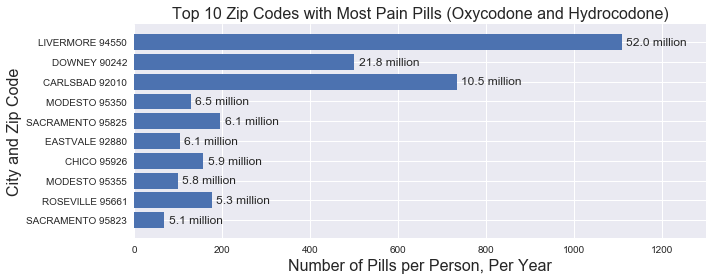

In [121]:
plt.figure(figsize=(10, 4))
plt.style.use('seaborn')
ncity = np.arange(1, 11)
plt.barh(ncity, merge['Pills Per Person'], zorder=3)
plt.title('Top 10 Zip Codes with Most Pain Pills (Oxycodone and Hydrocodone)', size=16)
yticklabels = []
for i, (p, pp) in enumerate(zip(merge['Pills'], merge['Pills Per Person'])):
    plt.text(pp+10, i+1, f'{p/1e6:.1f} million', verticalalignment='center', size=12)
    yticklabels.append(merge['City'].iloc[i] + ' ' + str(merge['Zip Code'].iloc[i]))
plt.xlim(0, 1300)
plt.yticks(ncity, yticklabels)
plt.xlabel('Number of Pills per Person, Per Year', size=16)
plt.ylabel('City and Zip Code', size=16)
plt.tight_layout()
plt.savefig('images/top10-pills-per-person.png', dpi=300)